In [1]:
from data_vis import _GET_USER_INFO, _PLOT_TIME, _PLOT_FIXATION_NUMBER, _PLOT_FIXATION_RATIO,\
    _PLOT_FIXATION_DISPERSION, _PLOT_FIXATION_TIME, _PLOT_FIXATION_AVG_TIME, _PLOT_FIXATION_RATIO_TIME,\
    _PLOT_FIXATION_DISPERSION_MM, _PLOT_SURFACE_TIME, _PLOT_FIXATION_DISTANCE, _PLOT_FIXATION_DISTANCE_RATIO

from conf import Users, Figures, Actions, Surface, Fixations, Steps, GazePoints
from table_loader import _GET, _LOAD, _TOLIST, _GET_ALL, _EXISTS, _GET_ALL_VALUES
import matplotlib.pyplot as plt
import constants as cst
from utils import _sum, centroid, distance, distance_min_block_corner, min

users = Users()
figures = Figures()
actions = Actions()
surfaces = Surface()
steps = Steps()

# User 316660

_PLOT_DISTANCE_OVER_TIME 316660


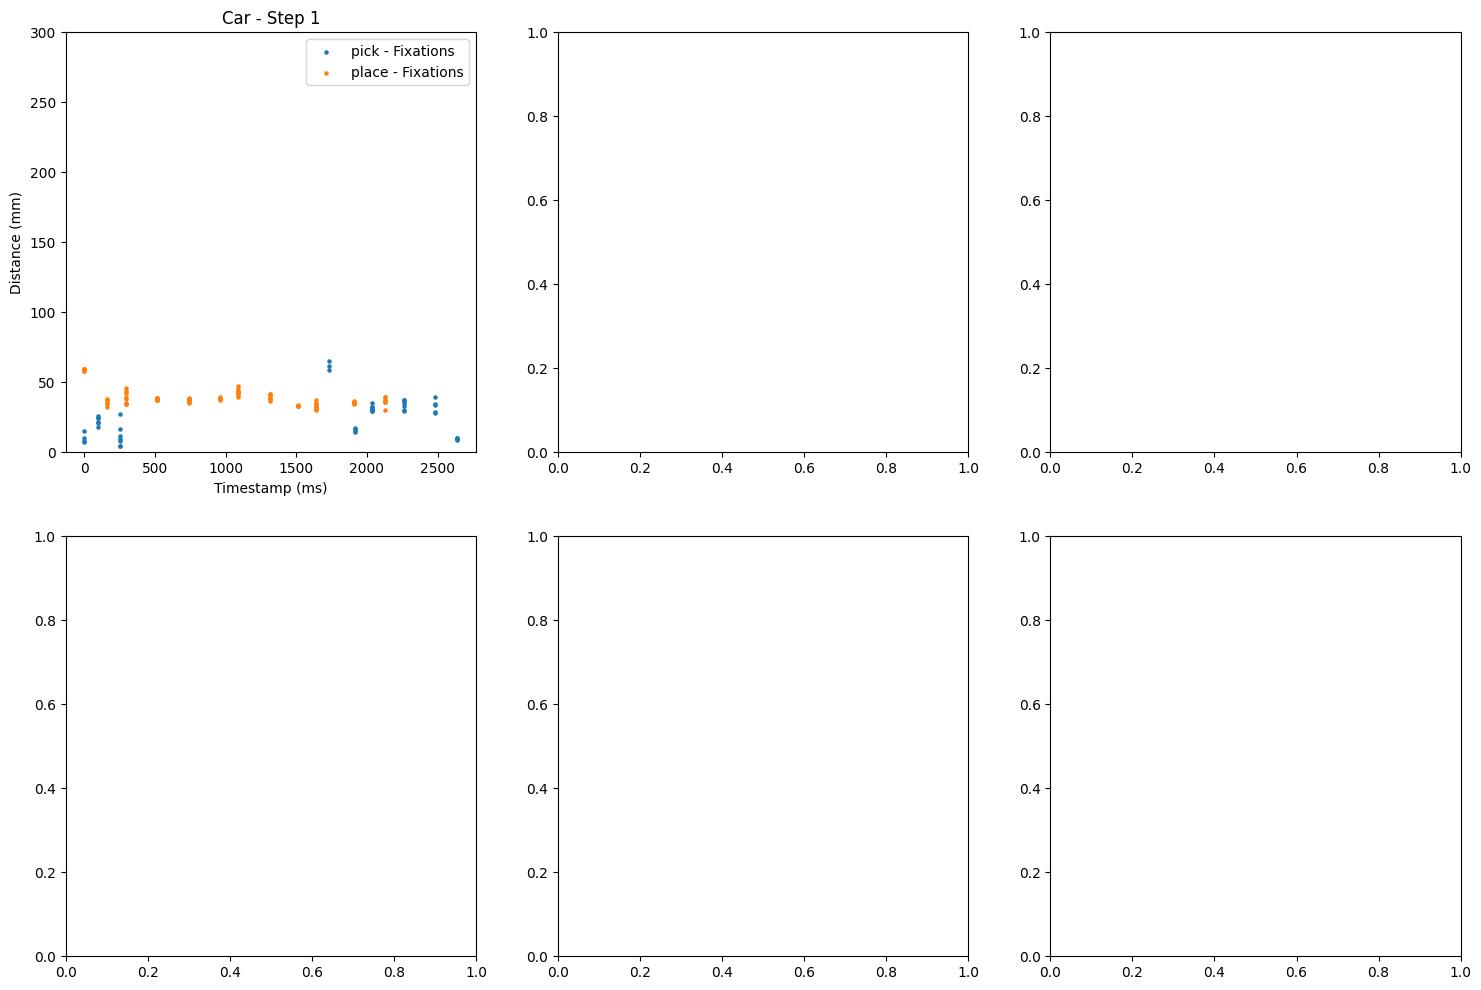

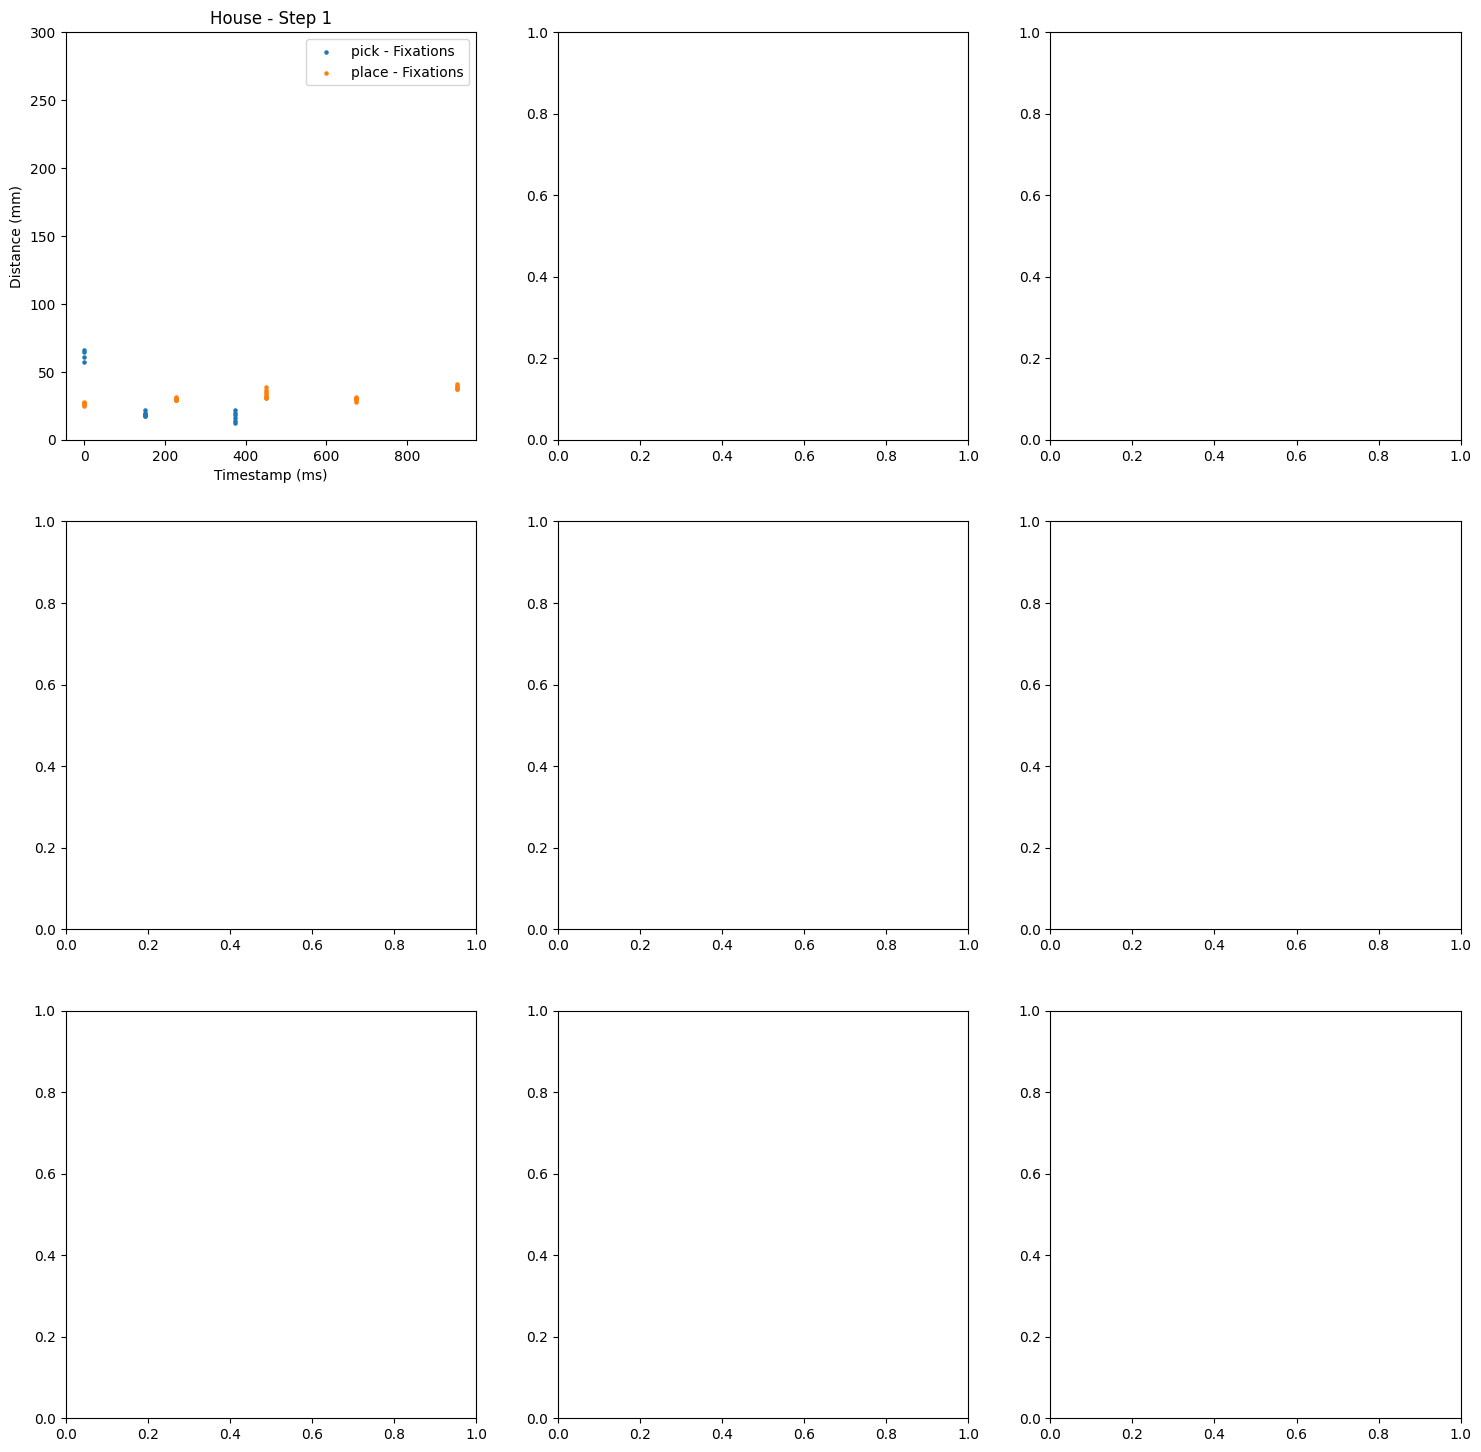

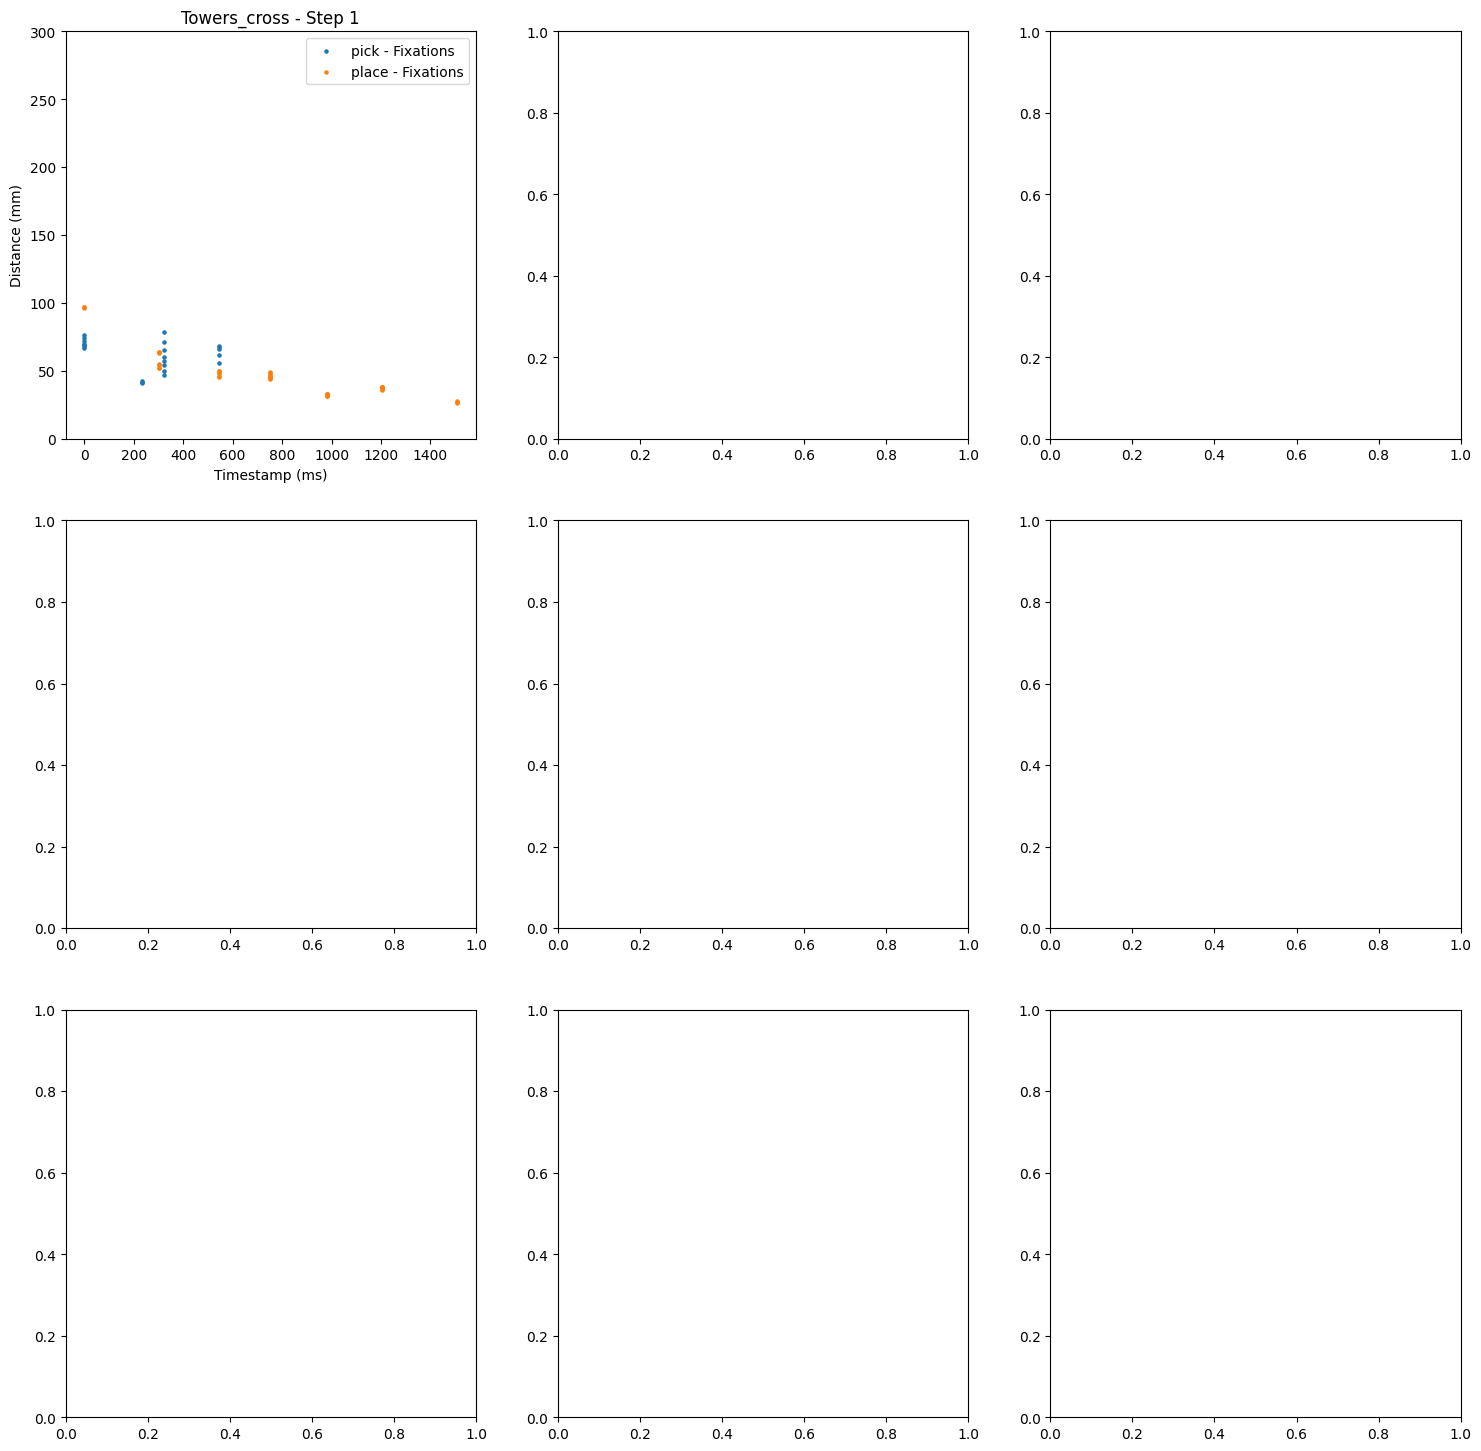

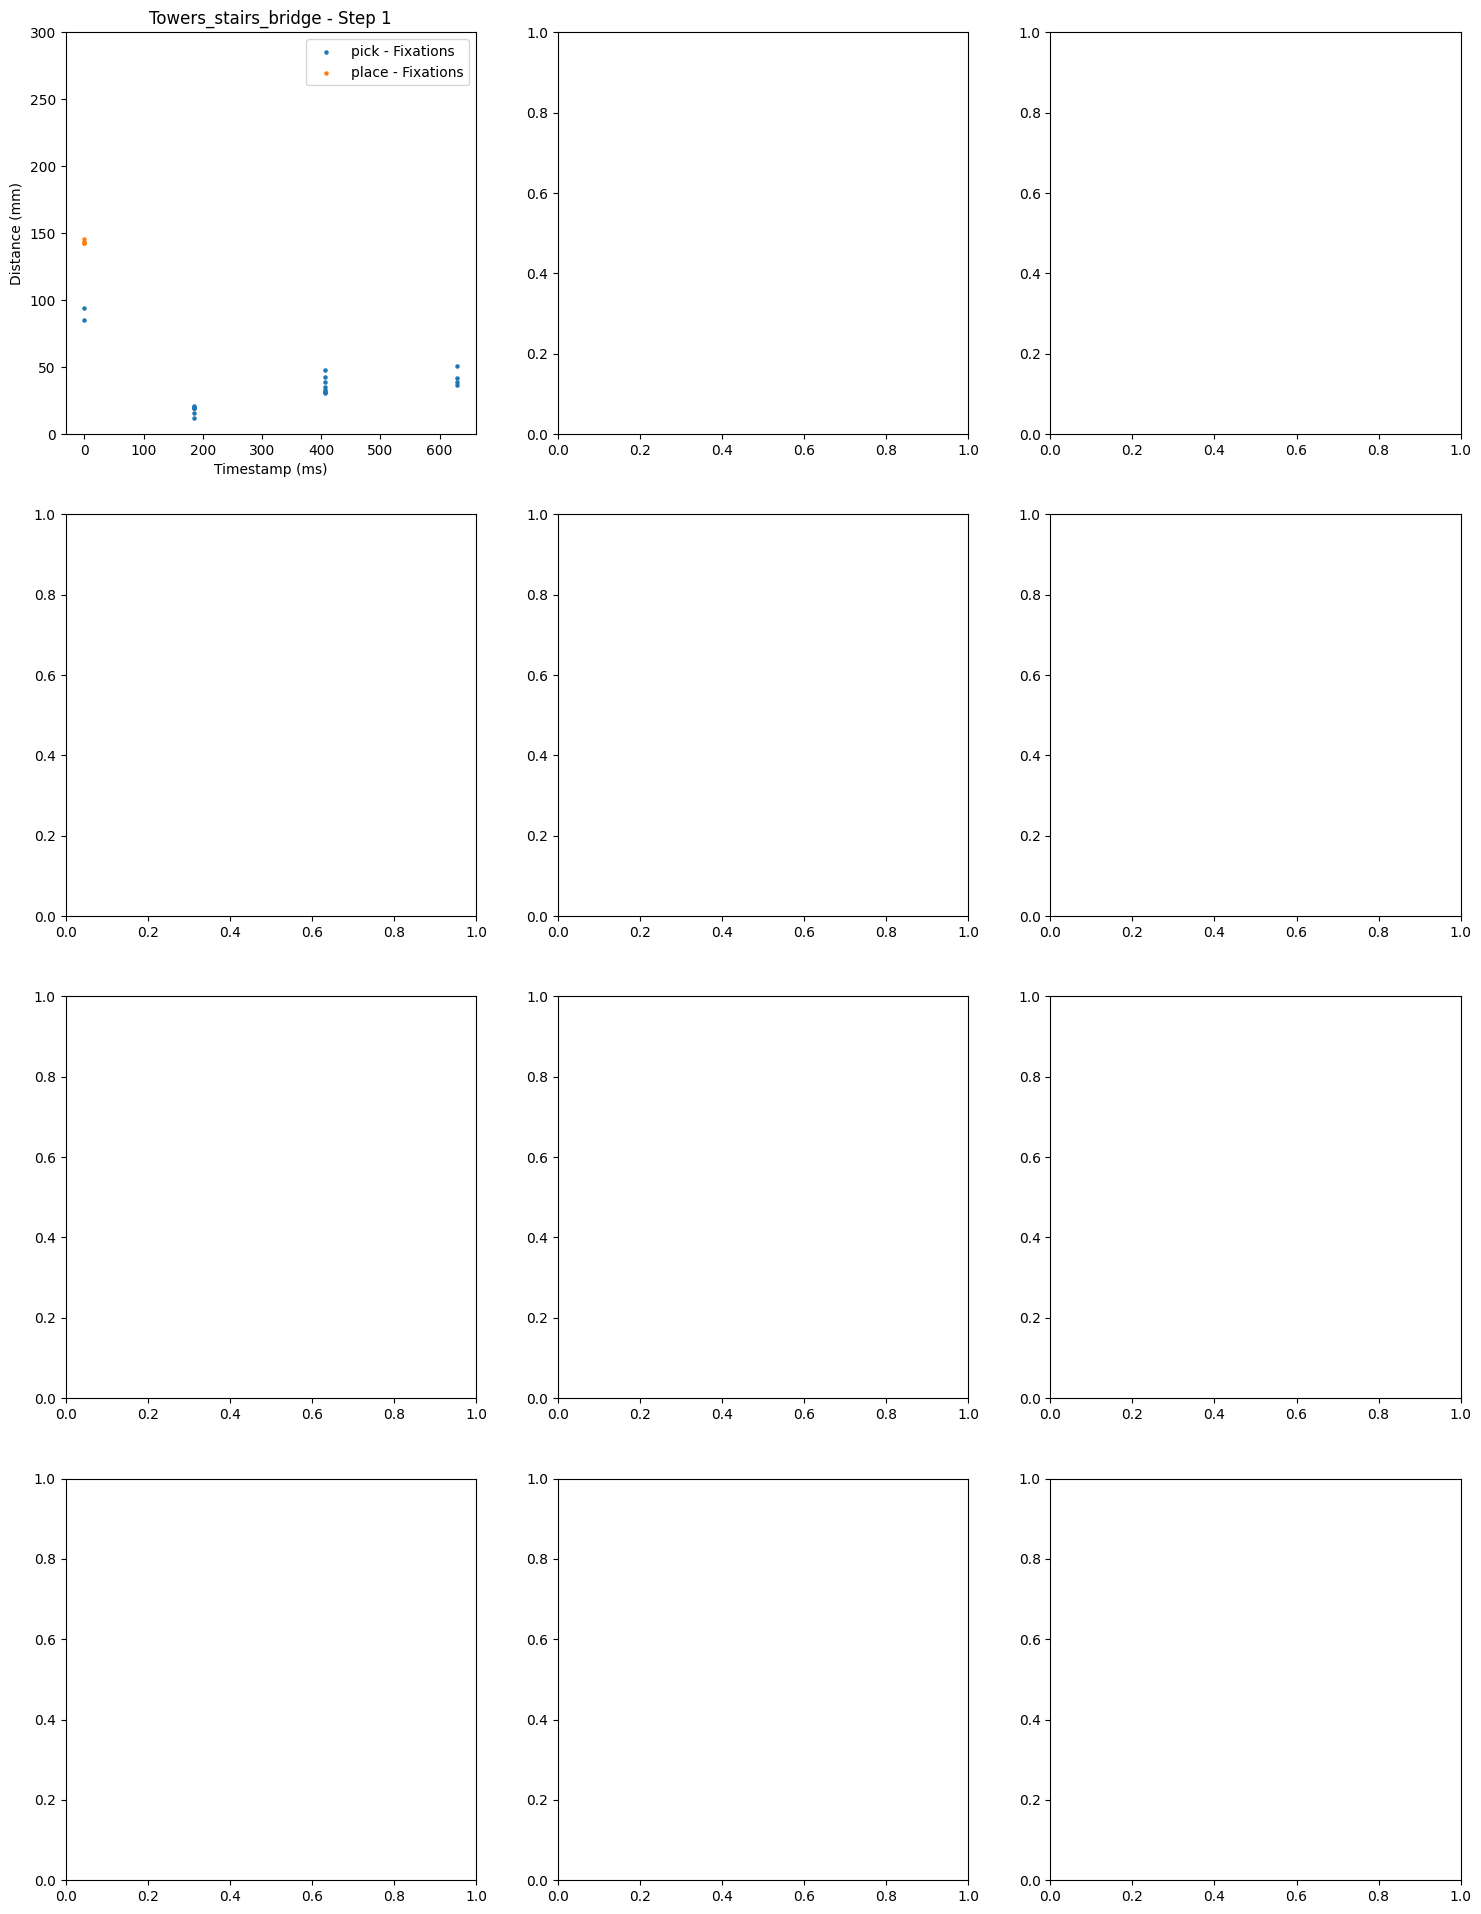

In [22]:
def get_to_plot(act, figId, step, s, x, y, tt, steps, surfaces):
    if(len(s) > 0):
        first_timestamp = min(tt)
        positions = []
        step_to_achieve = steps.get_step(figId, step)
        t = []
        for i in range(len(s)):
            p = [x[i], y[i]]
            if (act == 2 and s[i] == 2):
                positions.append(surfaces.get_absolute_coordinates(s[i], p))
                t.append(tt[i]-first_timestamp)
            elif ((act == 1 or act == 0) and s[i] == step_to_achieve.get_stock_surface()):
                positions.append(surfaces.get_absolute_coordinates(s[i], p))
                t.append(tt[i]-first_timestamp)
        if(act == 0):
            block_to_pick = step_to_achieve.block.position
            block_to_pick = [surfaces.get_norm_coordinates(\
                        step_to_achieve.get_stock_surface(),\
                        p) for p in block_to_pick]
            block_to_pick = [surfaces.get_absolute_coordinates(\
                        step_to_achieve.get_stock_surface(),\
                        p) for p in block_to_pick]
            dist = [distance_min_block_corner(p,block_to_pick) for p in positions]
        if(act == 1):
            block_to_pick = step_to_achieve.block.position
            block_to_pick = [surfaces.get_norm_coordinates(\
                    step_to_achieve.get_stock_surface(),\
                    p) for p in block_to_pick]
            block_to_pick = [surfaces.get_absolute_coordinates(\
                     step_to_achieve.get_stock_surface(),\
                    p) for p in block_to_pick]
            dist = [distance_min_block_corner(p,block_to_pick) for p in positions]
        if(act == 2):
            position_to_place = step_to_achieve.position_to_place
            position_to_place = [surfaces.get_norm_coordinates(\
                                                step_to_achieve.get_stock_surface(),\
                                                p) for p in position_to_place]
            position_to_place = [surfaces.get_absolute_coordinates(\
                                                step_to_achieve.get_stock_surface(),\
                                                p) for p in position_to_place]
            dist = [distance_min_block_corner(p,position_to_place) for p in positions]
        to_plot = [[],[]]
        for i in range(len(dist)):
            to_plot[0].append(t[i])
            to_plot[1].append(dist[i])
        return to_plot
    else:
        return [[],[]]

def _PLOT_DISTANCE_OVER_TIME(id):
    print("_PLOT_DISTANCE_OVER_TIME %d" % id)

    for figId in figures.get_figures_id_list():
        nb_row = 3
        coord = [[0,0], [0,1], [0,2], \
                 [1,0], [1,1], [1,2], \
                 [2,0], [2,1], [2,2]]
        if(figId == 0):
            nb_row = 2
            coord = [[0,0], [0,1], [0,2], \
                 [1,0], [1,1], [1,2]]
        if(figId == 3):
            nb_row = 4
            coord = [[0,0], [0,1], [0,2], \
                 [1,0], [1,1], [1,2], \
                 [2,0], [2,1], [2,2], \
                 [3,0], [3,1], [3,2]]
        fig, axs = plt.subplots(nb_row, 3, figsize=(18, nb_row * 6))
        csvfile = ("../data/%d_%s_gazepoints.csv" % (id, figures.get_figure_name(figId)))
        gazepoints = GazePoints(csvfile)
        csvfile = ("../data/%d_%s_fixations.csv" % (id, figures.get_figure_name(figId)))
        fixations = Fixations(csvfile)
        for step in range(1, 2): # Un graphe par étape, les deux actions dans le graphe
#         for step in range(1, figures.get_figure_n_steps(figId)+1): # Un graphe par étape, les deux actions dans le graphe
            ax = axs[coord[step-1][0], coord[step-1][1]]
            ax.set_title("%s - Step %d" % (figures.get_figure_name(figId).capitalize(), step))
            ax.set_xlabel('Timestamp (ms)')
            ax.set_ylabel('Distance (mm)')
            ax.set_ylim(0,300)
            for act in actions.get_actions_id_list():
                if(act == 0):
                    continue
                to_plot = []
                positions = []
                step_to_achieve = steps.get_step(figId, step)
                s = [gz.surface for gz in gazepoints.get_gazepoints(step, act)]
                x = [gz.x for gz in gazepoints.get_gazepoints(step, act)]
                y = [gz.y for gz in gazepoints.get_gazepoints(step, act)]
                tt = [gz.timestamp for gz in gazepoints.get_gazepoints(step, act)]
                to_plot = get_to_plot(act, figId, step, s, x, y, tt, steps, surfaces)
#                 ax.scatter(to_plot[0], to_plot[1], label=("%s - Gazepoints" % actions.get_action_name(act)), s=5)
                to_plot = []
                positions = []
                step_to_achieve = steps.get_step(figId, step)
                s = [fix.surface for fix in fixations.get_fixations(step, act)]
                x = [fix.x for fix in fixations.get_fixations(step, act)]
                y = [fix.y for fix in fixations.get_fixations(step, act)]
                tt = [fix.timestamp for fix in fixations.get_fixations(step, act)]
                to_plot = get_to_plot(act, figId, step, s, x, y, tt, steps, surfaces)
                ax.scatter(to_plot[0], to_plot[1], label=("%s - Fixations" % actions.get_action_name(act)), s=5)
            ax.legend()
#         fig.savefig("output/png/%d_PLOT_DISTANCE_OVER_TIME_%s.png" % (id, figures.get_figure_name(figId).capitalize()))
_PLOT_DISTANCE_OVER_TIME(316660)

## Time

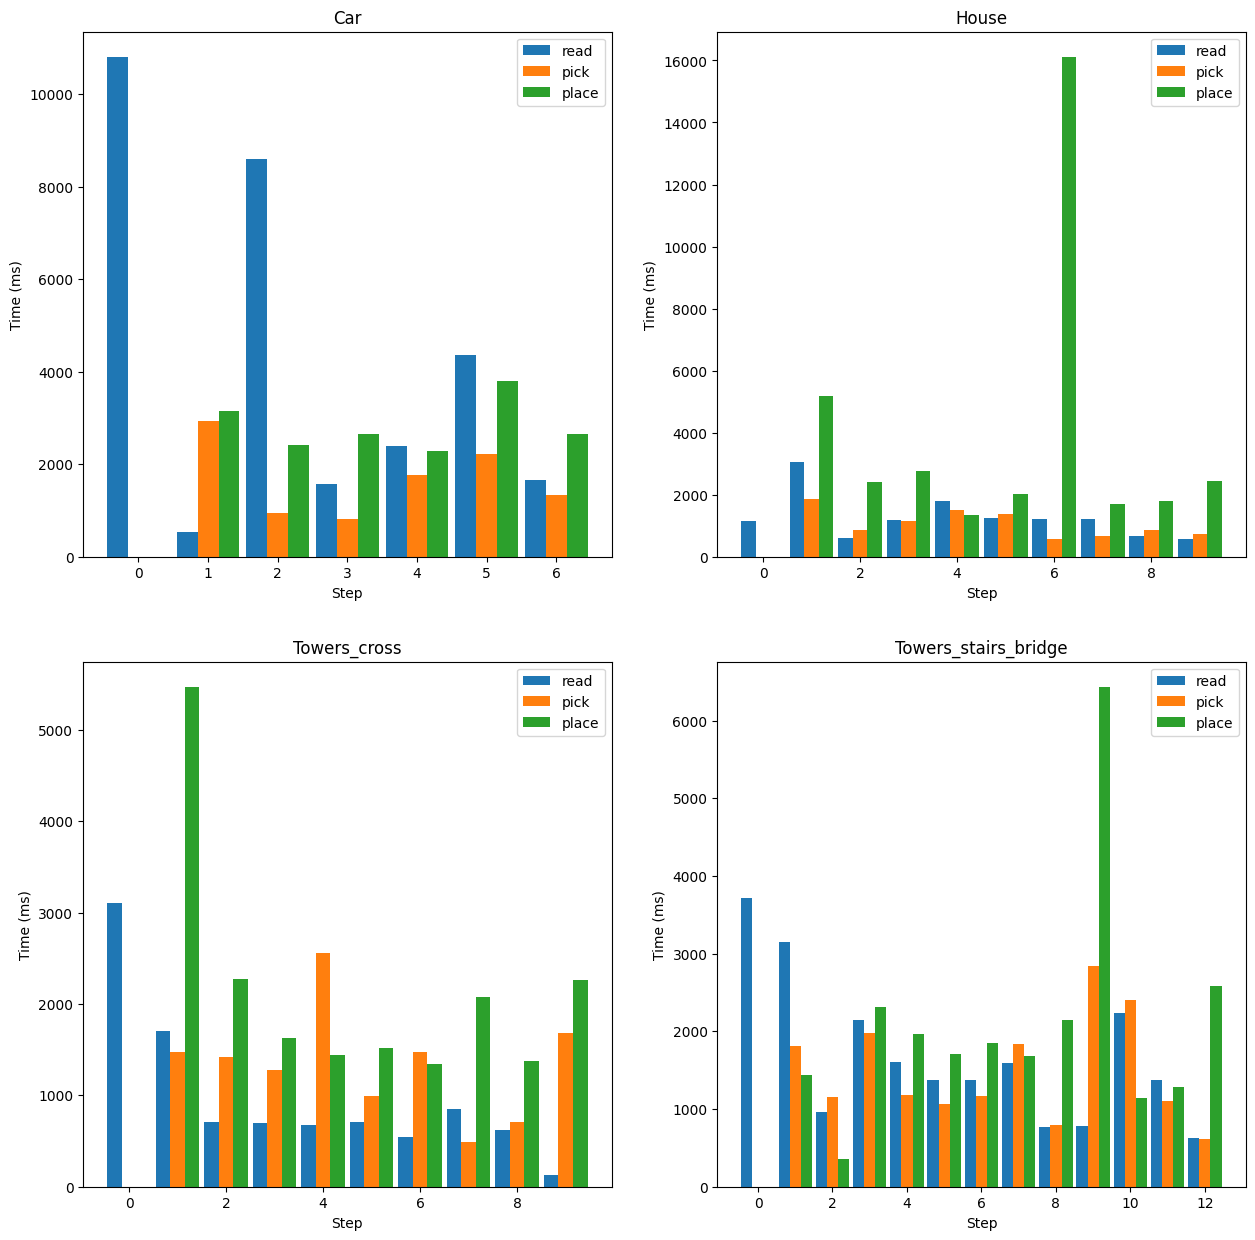

In [11]:
_PLOT_TIME(316660)

## Fixations

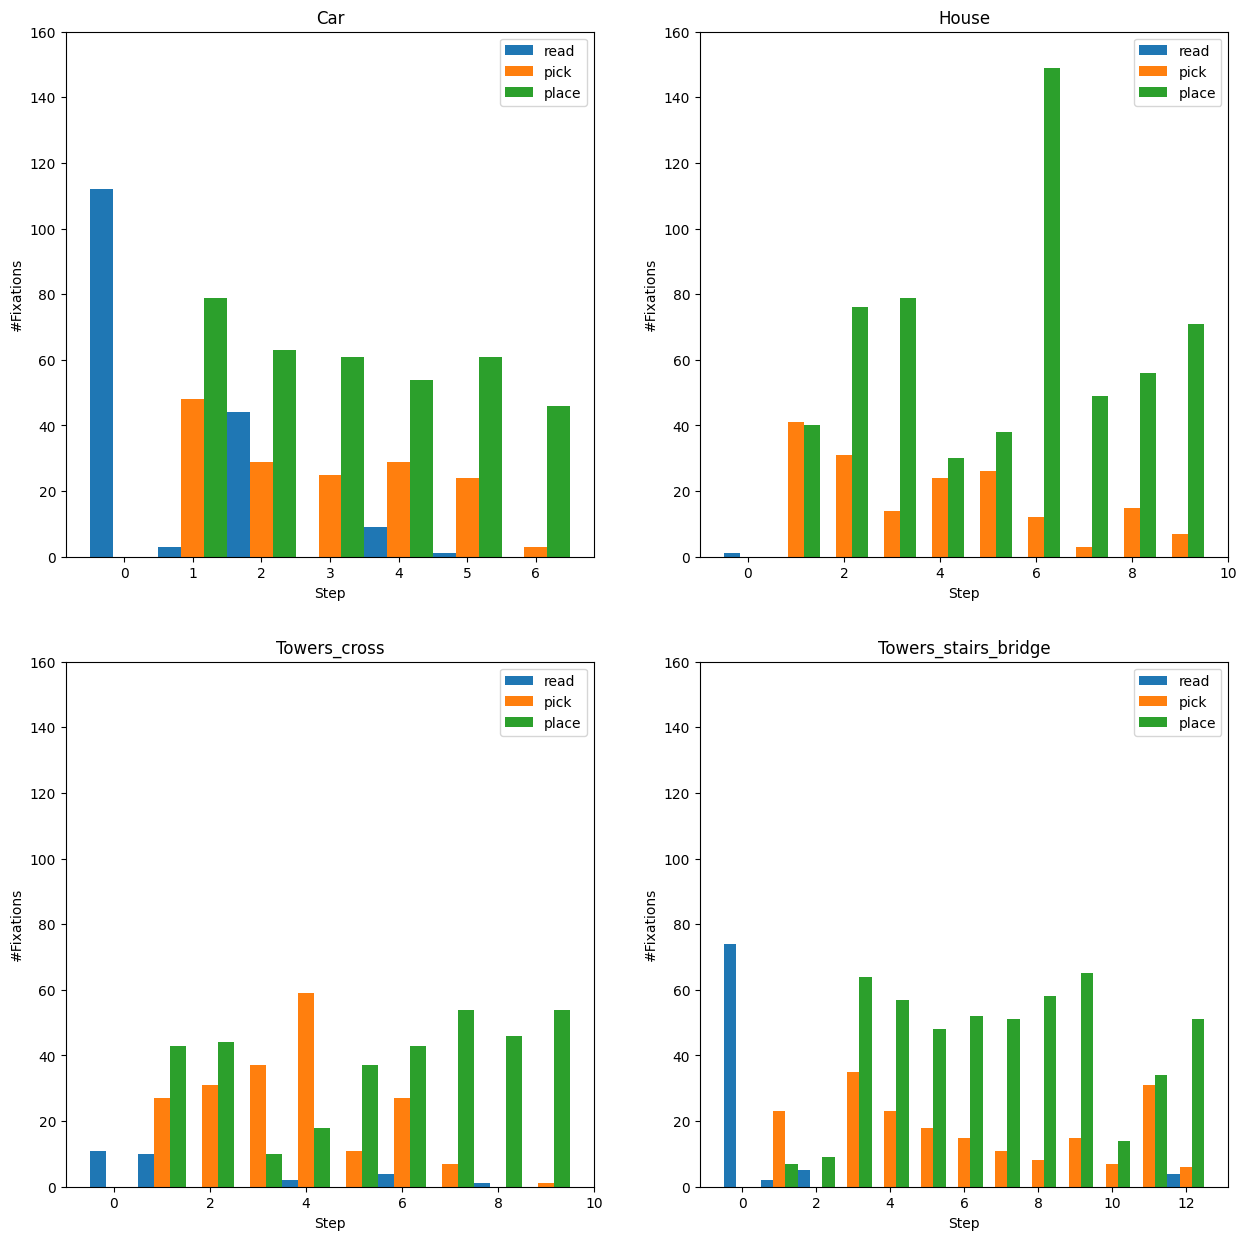

In [13]:
_PLOT_FIXATION_NUMBER(316660)

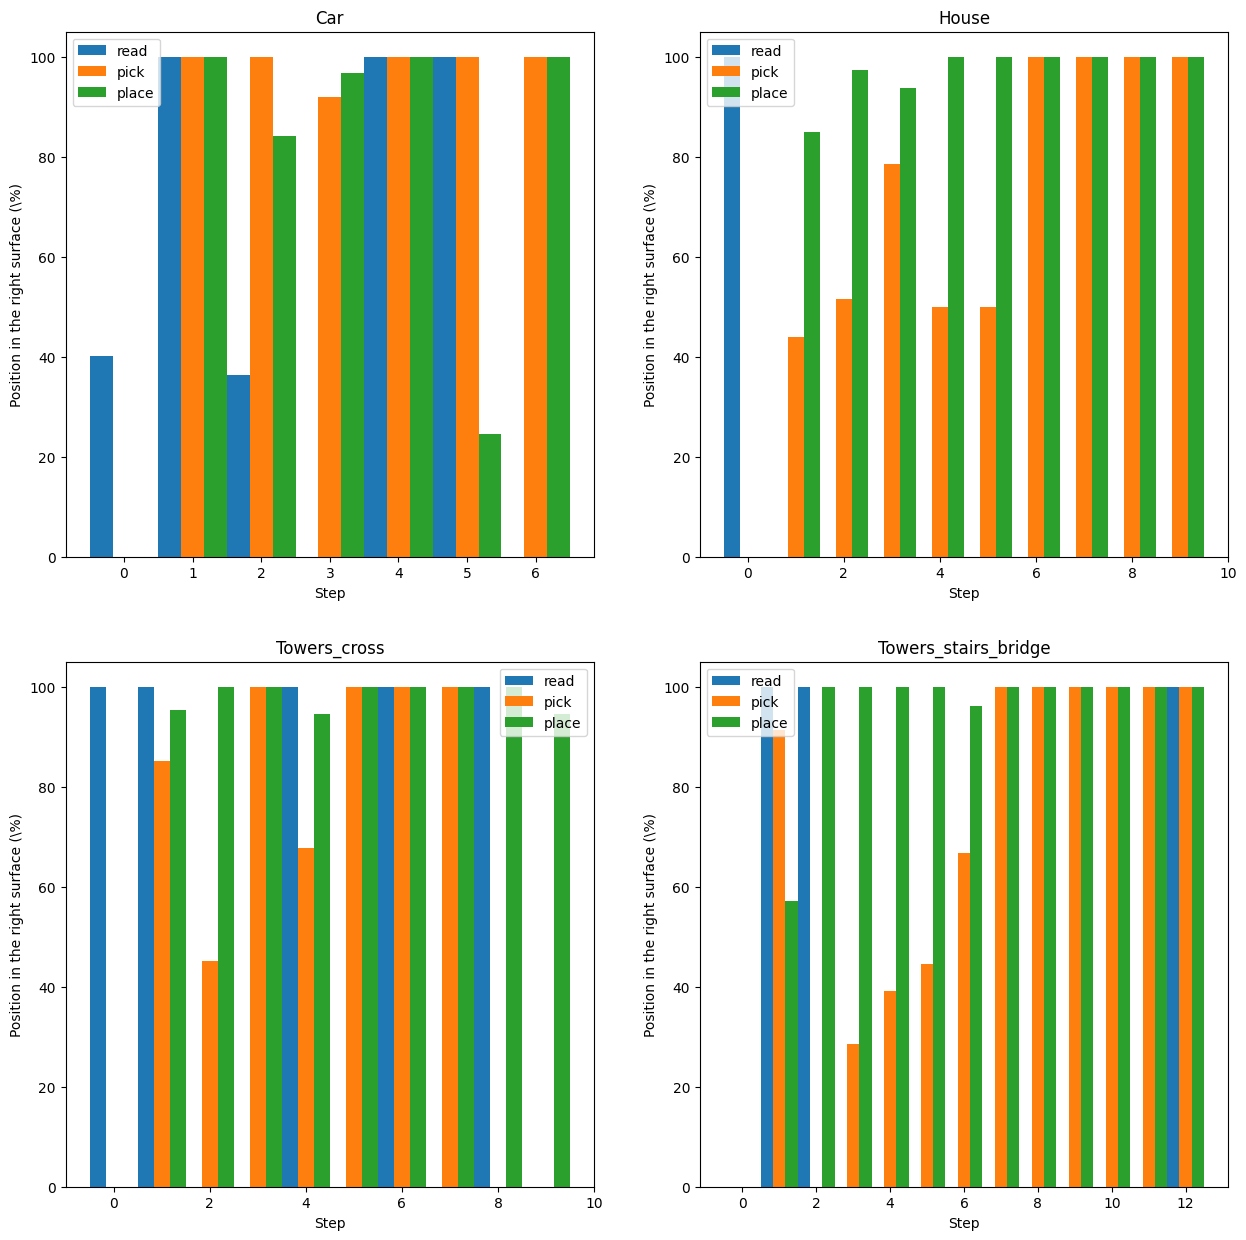

In [14]:
_PLOT_FIXATION_RATIO(316660)

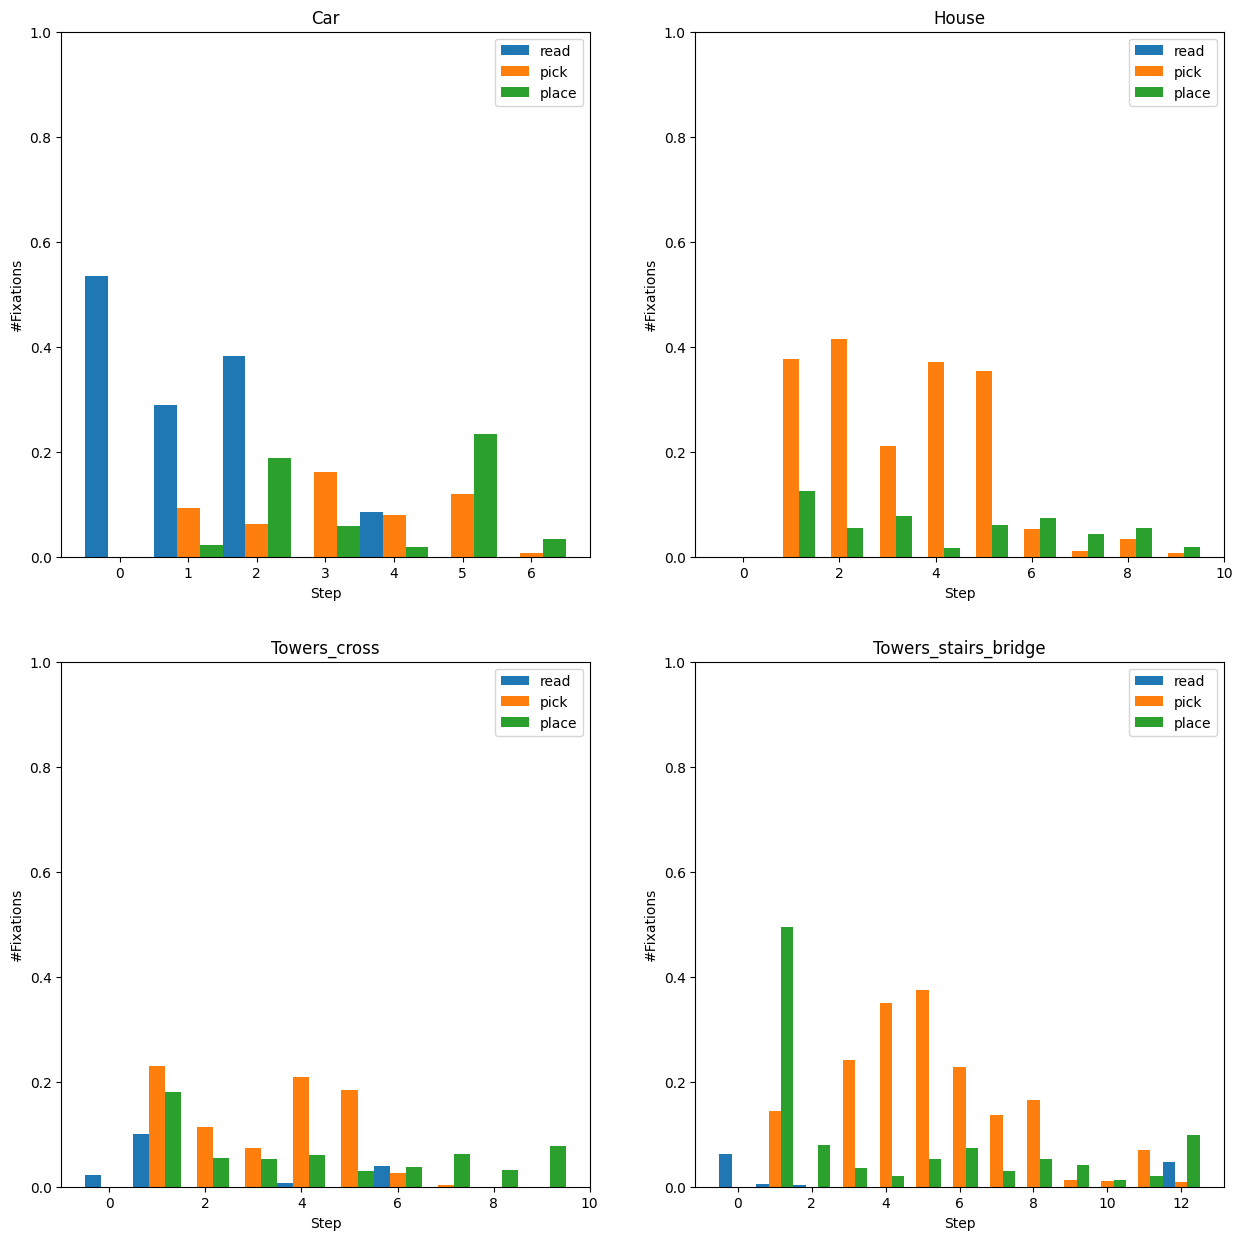

In [15]:
_PLOT_FIXATION_DISPERSION(316660)

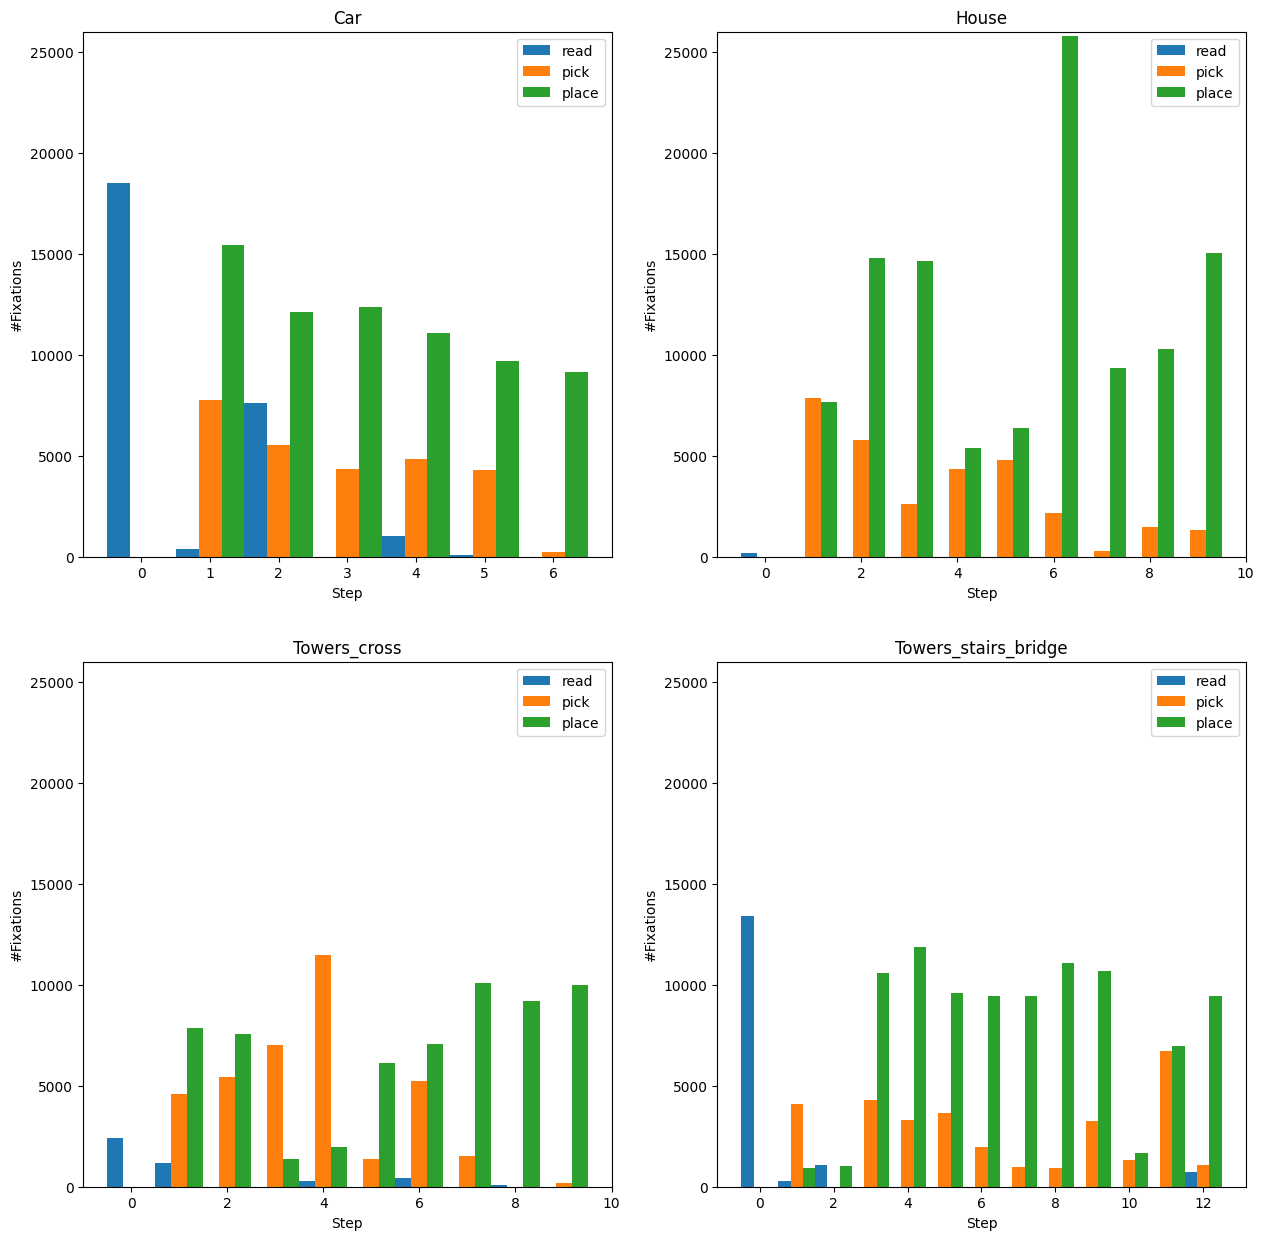

In [16]:
_PLOT_FIXATION_TIME(316660)

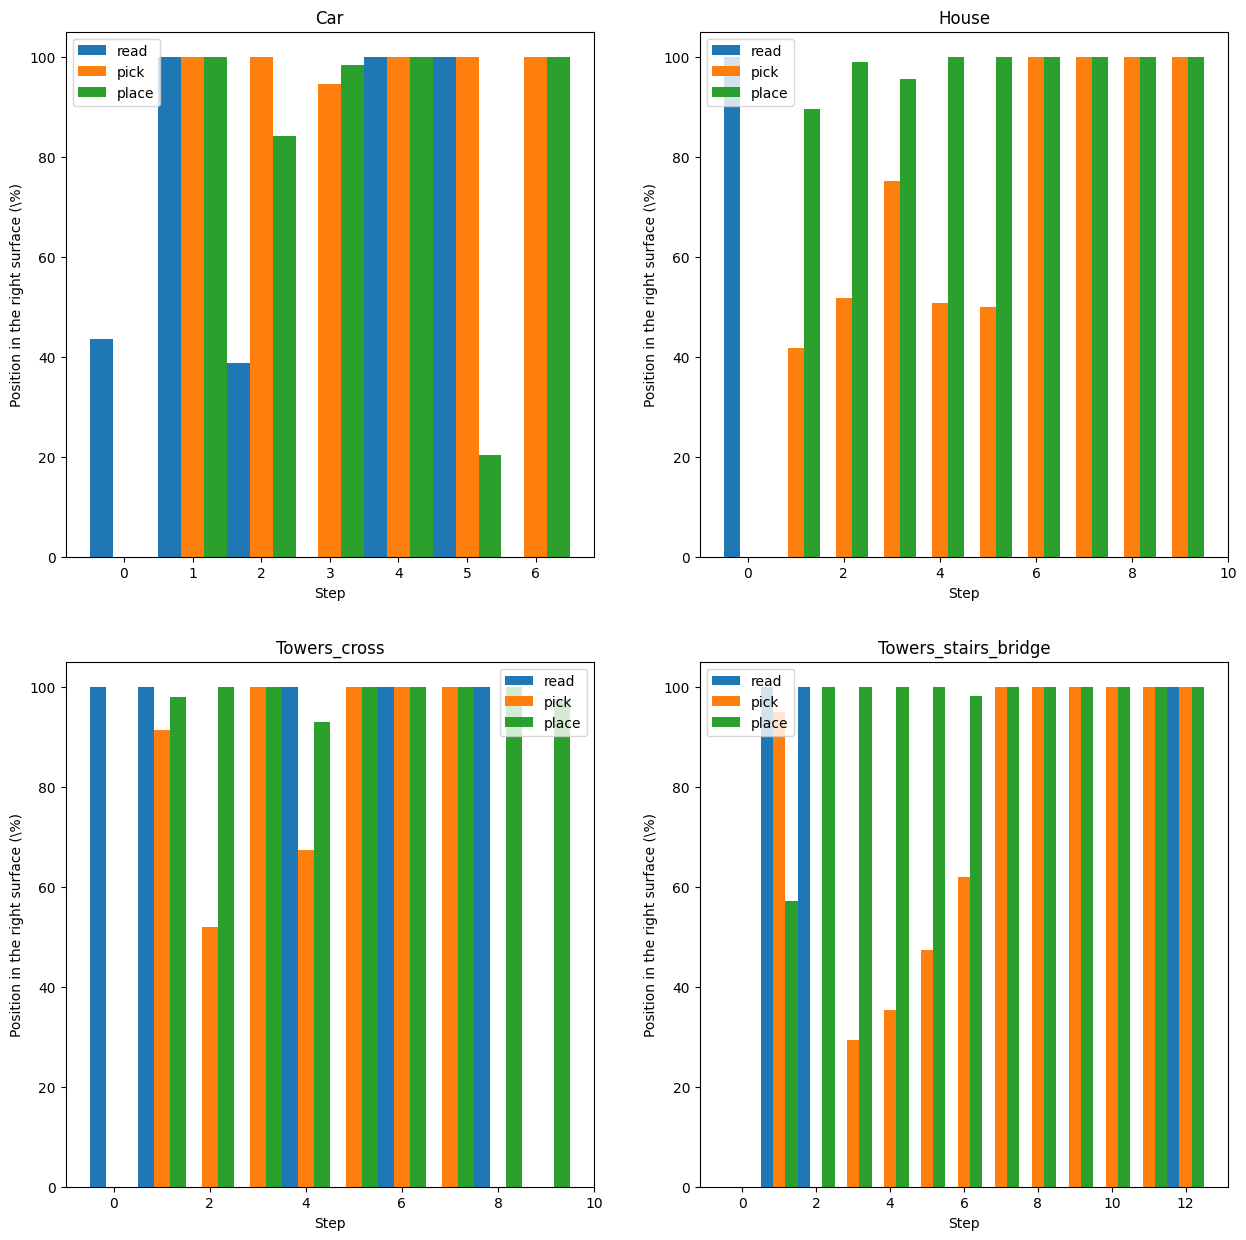

In [17]:
_PLOT_FIXATION_RATIO_TIME(316660)

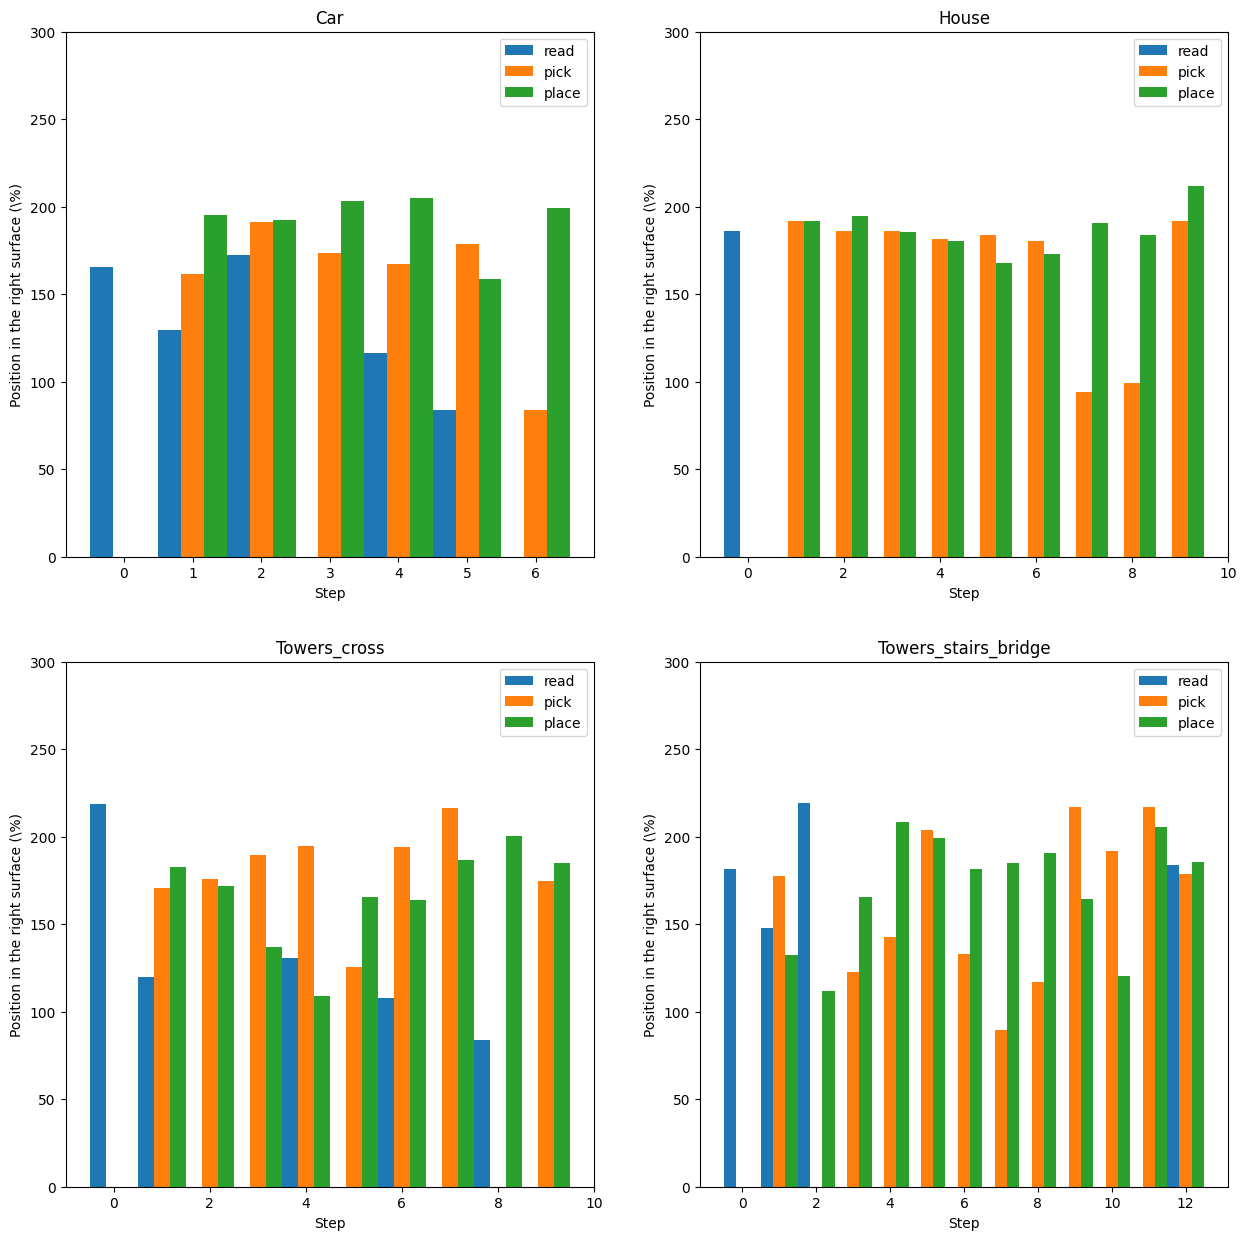

In [18]:
_PLOT_FIXATION_AVG_TIME(316660)

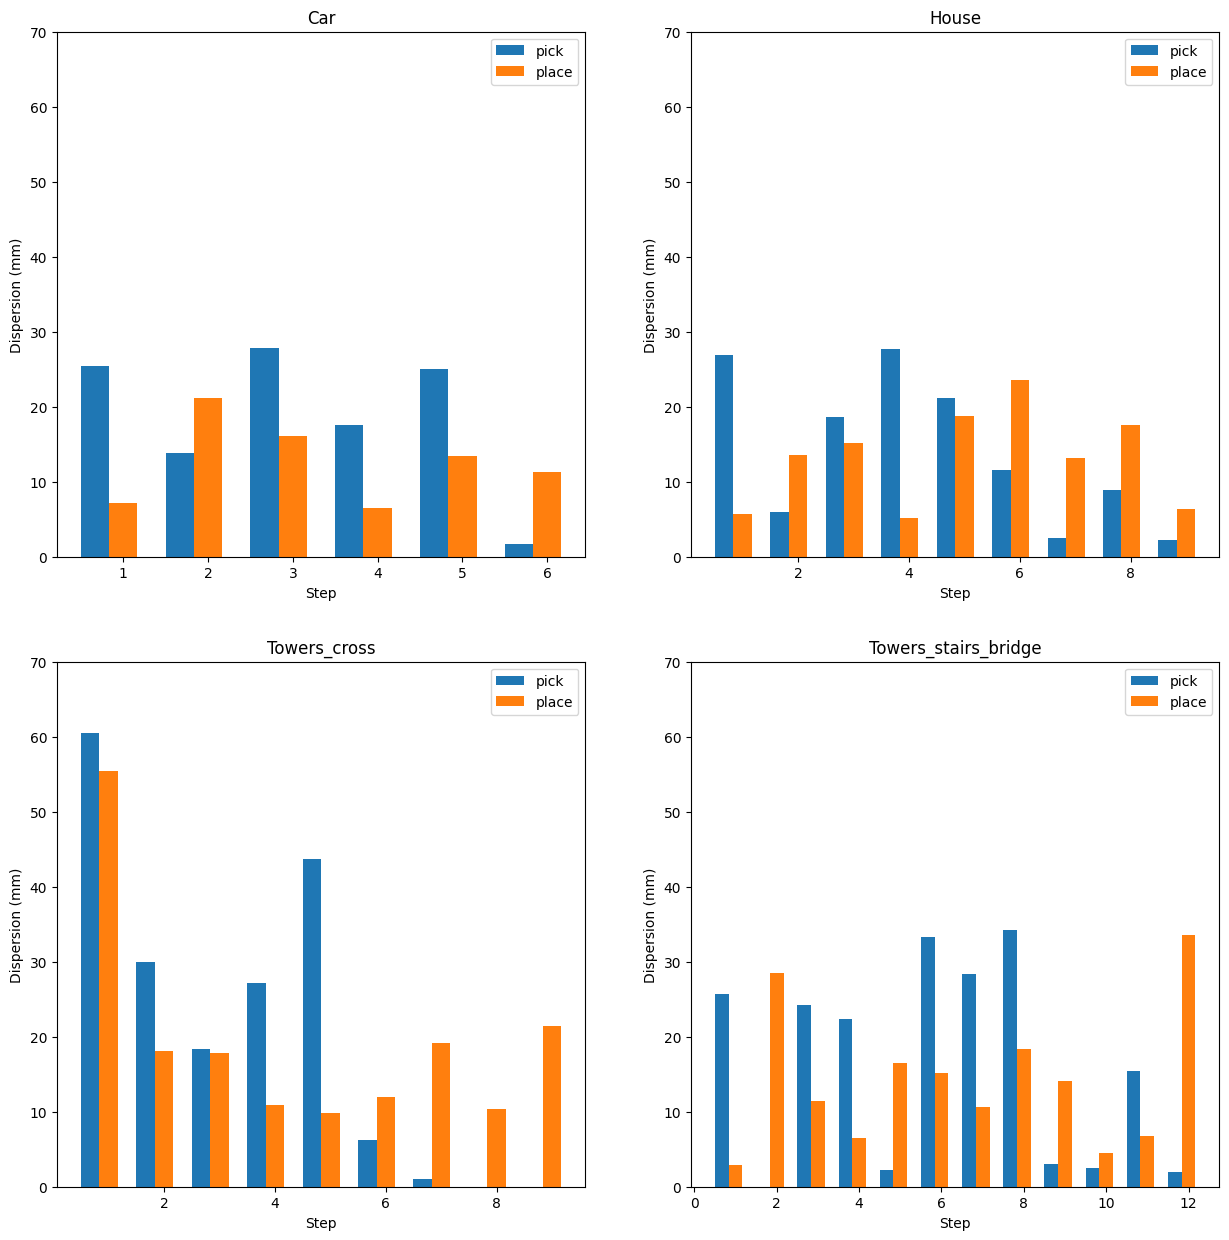

In [10]:
_PLOT_FIXATION_DISPERSION_MM(316660)